<a href="https://colab.research.google.com/github/ahsansaleem/github-final-project/blob/main/Project_Case_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3: Load in the Dataset in your Jupyter Notebook

In [12]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#Task 4: Generate Descriptive Statistics and Visualizations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


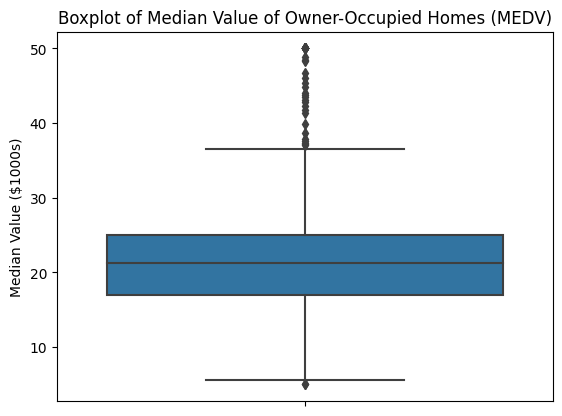

In [14]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure()
sns.boxplot(y=boston_df["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("Median Value ($1000s)")
plt.show()

The boxplot plot shows us the median values of the homes as well as the interquartile range. The dots above the whiskers represent a few outliers. The median is slightly above 20.

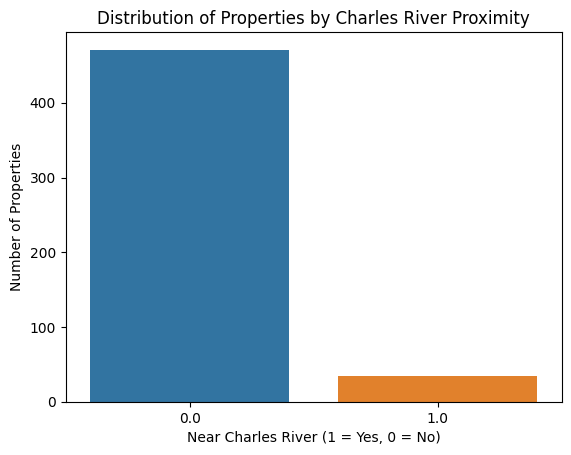

In [15]:
#Provide a  bar plot for the Charles river variable
plt.figure()
sns.countplot(x=boston_df["CHAS"])
plt.title("Distribution of Properties by Charles River Proximity")
plt.xlabel("Near Charles River (1 = Yes, 0 = No)")
plt.ylabel("Number of Properties")
plt.show()

The bar plot displays how many properties that are near or away from the charles river. From the plot we can observe that the majority of properties aren't near the charles river.

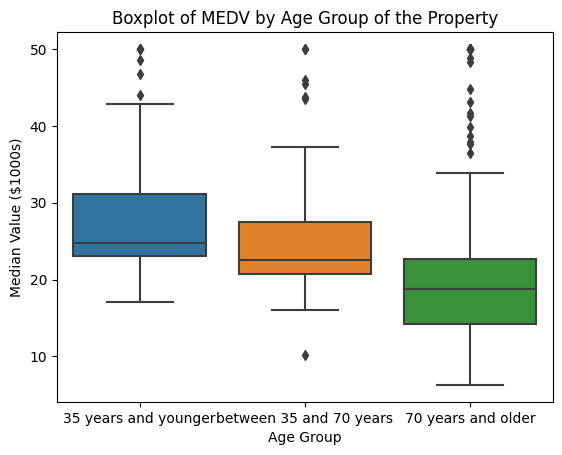

In [16]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["35 years and younger", "between 35 and 70 years", "70 years and older"], right=False)
plt.figure()
sns.boxplot(x=boston_df["AGE_group"], y=boston_df["MEDV"])
plt.title("Boxplot of MEDV by Age Group of the Property")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000s)")
plt.show()

The boxplot plot shows us the median values of the homes as well as the interquartile range. In this boxplot we see the median values of homes based on their age groups. It seems that newer homes tend to have a higher median value than homes aged between 35 and 70 years. The oldest homes (70 years and older) have the most varied price meaning their prices range is the largest.

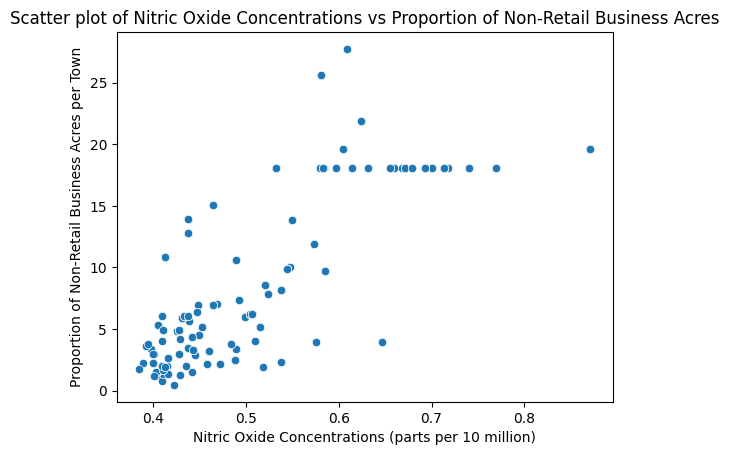

In [17]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations
#and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure()
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"])
plt.title("Scatter plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres")
plt.xlabel("Nitric Oxide Concentrations (parts per 10 million)")
plt.ylabel("Proportion of Non-Retail Business Acres per Town")
plt.show()

This scatter plot visualizes the relationship between nitric oxide concentrations and the proportion of non-retail business acres in the town. It appears that areas with higher proportions of non-retail business acres also tend to have higher nitric oxide concentrations. This suggests that places with more businesses might have more pollution.

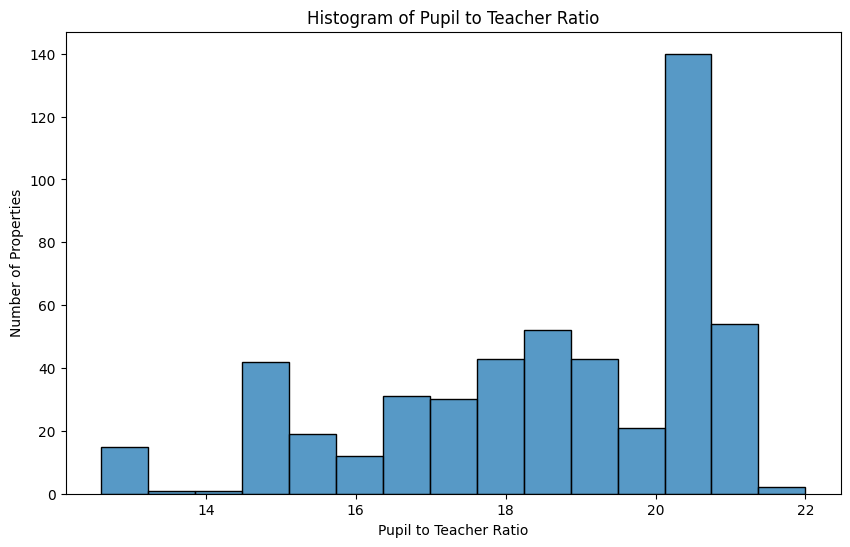

In [18]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(boston_df["PTRATIO"], bins=15)
plt.title("Histogram of Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Number of Properties")
plt.show()

This histogram shows the distribution of the pupil-to-teacher ratio in schools near the properties. We observe a higher ratio might indicate bigger class sizes.

#Task 5: Use the appropriate tests to answer the questions provided.

In [19]:
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

In [20]:
#1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

g_by_r = [boston_df["MEDV"][boston_df["CHAS"] == 0],
                    boston_df["MEDV"][boston_df["CHAS"] == 1]]
t_1, p_1 = ttest_ind(g_by_r[0], g_by_r[1])

print("T-statistic:" + str(t_1))

print("P-value:" + str(p_1))

T-statistic:-3.996437466090509
P-value:7.390623170519905e-05


Since the p-value is much less than alpha which is equal to 0.05, we can reject the null hypothesis. Hence there is a significant difference in the median value of houses bounded by the Charles river.

In [21]:
#2Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
f_2, p_2 = f_oneway(boston_df["MEDV"][boston_df["AGE_group"] == "35 years and younger"],
                             boston_df["MEDV"][boston_df["AGE_group"] == "between 35 and 70 years"],
                             boston_df["MEDV"][boston_df["AGE_group"] == "70 years and older"])


print("F-statistic:" + str(f_2))

print("P-value:" + str(p_2))

F-statistic:30.566839914861454
P-value:3.435569235360708e-13


Since the p-value is much less than alpha which is equal to 0.05, we can reject the null hypothesis. Which means that there is at least one age group where a different median house value than the others.

In [22]:
# 3. Pearson Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
corr_c, p_3 = pearsonr(boston_df["NOX"], boston_df["INDUS"])



print("Pearson Correlation Coefficient:" + str(corr_c))

print("P-value:" + str(p_3))

Pearson Correlation Coefficient:0.7636514469209151
P-value:7.913361061239527e-98



correlation coefficient = 0.7637 which shows a relatively strong positive relationship between the two variables. Also since the p values is so low, we can reject the null hypothesis.So we can state that there is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.